# Sect 25: Intro to Logistic Regression 

- online-ds-ft-100719
- 03/24/20

## Topics in Sect 25

- Supervised vs Unsupervised Learning
- Logistic Regression
- Evaluating Classifiers
- Class Imbalance Problems

# Types of Machine Learning Models
## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png">

# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/learn-co-curriculum/ds-lessons-starter/master/logistic_regression/img/linear_vs_logistic_regression.jpg?token=AKWNGY4DACEK65UQB3MKJCC6P2MUS">

## How is it used?

### Linear Regression

Trying to find the **relationship**

### Classification

Really more of a "yes" or "no"

> _"You're either with us, or against us"_

## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

## Classification: Use Logistic Regression

Probability of belonging to a particular group

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

## What do we know about linear regression?

- What are the requirements for the variables types?
- What assumptions do we have?
- How do we interpret the coefficients?
- What metrics do we use to evaluate our model?

And how will logistic regression be different?

### Scenarios 

# Implementing Logistic Regression

#### Scenario 1: Predict income together
In this example, we want to find a relationship between age and monthly income. It is definitely reasonable to assume that, on average, older people have a higher income than younger people who are newer to the job market and have less experience. A potential relationship could look like the plot below. The monthly income is shown in 1000 USD.

#### Scenario 2: Predict likelihood of diabetes
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. [reference here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [8]:
# !pip install fsds_100719
from fsds_100719.imports import *

In [15]:
import sklearn.metrics as metrics
import sklearn.metrics as met

# import some data to play with
from sklearn import datasets

# For our modeling steps
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
import os
os.listdir('logistic_regression/')

['logistic.ipynb',
 'Classifier-Evaluation-Teacher-Version.ipynb',
 'salaries_final.csv',
 'img',
 '.ipynb_checkpoints',
 'diabetes.csv',
 'intro_log_regr']

In [24]:
df = pd.read_csv('logistic_regression/salaries_final.csv',index_col=0)
display(df.head())
display(df['Target'].value_counts(), df['Education'].value_counts())

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


<=50K    24720
>50K      7841
Name: Target, dtype: int64

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [25]:
df = pd.get_dummies(df,columns=['Target'],drop_first=True)

In [71]:
educated = ['Bachelors','Masters']
df2 = df[df['Education'].isin(educated)].sample(100,random_state=42)

In [72]:
age = df2[['Age']].copy()
income = df2['Target_>50K'].copy()

In [73]:
# df2.plot('Age','Target_>50K',kind='scatter')

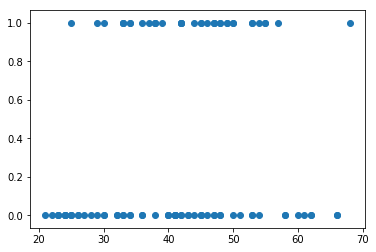

In [74]:
plt.scatter(age,income)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# create linear regression object
lin_reg = LinearRegression()
lin_reg.fit(age, income)
# store the coefficients
coef = lin_reg.coef_
interc = lin_reg.intercept_
# create the line
lin_income = (interc + age * coef)

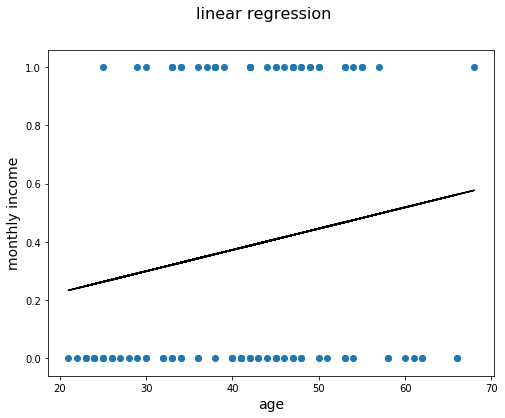

In [76]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.plot(age, lin_income, c = "black")
plt.show()

In [78]:
# Create logistic regression object
regr = LogisticRegression(C=1e5)
# Train the model using the training sets
regr.fit(age, income)

//anaconda3/envs/learn-env0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# store the coefficients
coef = regr.coef_
interc = regr.intercept_
# create the linear predictor
lin_pred= (age * coef + interc)
# perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))
#sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income),key=lambda x: x[0]))
age_ordered

('Age',)

In [81]:
np.set_printoptions(suppress=True)
print(mod_income[:6])

            Age
31636  0.376110
29592  0.354173
3176   0.436917
6929   0.260674
8850   0.318971
8705   0.312157


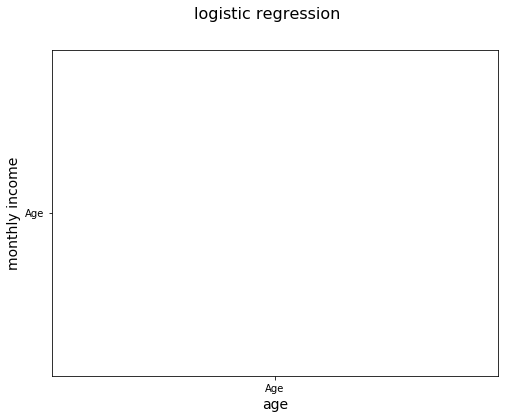

In [83]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(age, income)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.plot(age_ordered, mod_income_ordered, c = "black")
plt.show()

# PRIOR SG BELOW

## Play with some data

### Heart Dataset - Predicting if Heart Disease

In [77]:
heart_csv='https://raw.githubusercontent.com/learn-co-students/dsc-roc-curves-and-auc-online-ds-ft-100719/master/heart.csv'
df = pd.read_csv(heart_csv)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


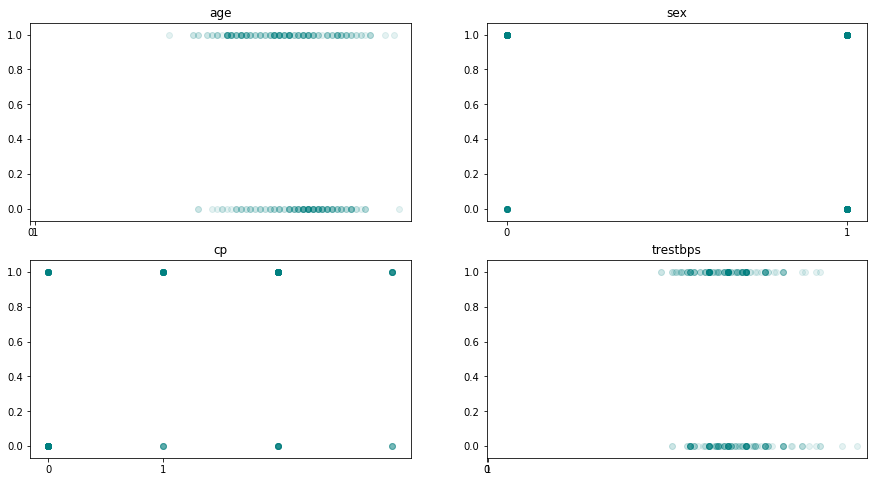

In [4]:
import matplotlib.pyplot as plt

# Creating a large figure
fig = plt.figure(figsize=(15, 8))

# Iterating over the different
for i in range(0, 4):
    # Figure number starts at 1
    ax = fig.add_subplot(2, 2, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(df.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter( df.iloc[:,i],df['target'], c='teal', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df.target.unique())

In [6]:
# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape,X_test.shape, y_test.shape

((227, 13), (76, 13), (76,))

We can go ahead and explore some graphs to show that it doesn't make sense to do a linear regression


In [7]:
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [9]:
# Predict
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

# Data preview
# print("")

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-visualizing-confusion-matrices-lab-online-ds-ft-100719/master/images/new_confusion_matrix_2.png">

In [12]:
fs.ihelp(fs.jmi.plot_confusion_matrix)

------------------------------------------------------------------------------------
------ HELP ------------------------------------------------------------------------

Help on function plot_confusion_matrix in module fsds_100719.jmi:

plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=None, print_matrix=True)
    Check if Normalization Option is Set to True. If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=None,
                          print_matrix=True):
    """Check if Normalization Option is Set to True. If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function."""
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    if cmap==None:
        cmap = plt.get_cmap("Blues")

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

```

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c21415240>)

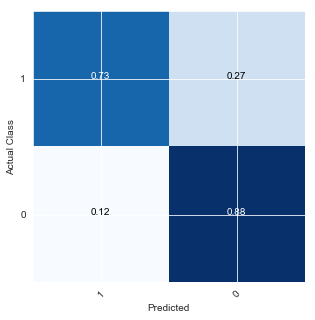

In [69]:
from sklearn.metrics import confusion_matrix
import itertools
## Confusion matrix
# def get_confusion_matrix(y_true, y_pred):
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,cmap= "Blues",normalize=True,figsize=(5,5),ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    else:
        fig = ax.get_figure()
        
    cmap = plt.get_cmap(cmap)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max()/2 

    
    ax.imshow(cm,cmap)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    classes=[1,0]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
#     ax = plt.gca()
    ax.set(ylabel='Actual Class',xlabel='Predicted')
#     fig = plt.gcf()
    
    return fig,ax
cm = confusion_matrix(y_test,y_hat_test)
plot_confusion_matrix(cm)

### Classification Report

In [39]:
def print_classification_report(y_test, y_hat_test):
    print('---'*20 +'\n'+"[i] CLASSIFICATION REPORT:\n")
    print(metrics.classification_report(y_test,y_hat_test))
    print('---'*20)
print_classification_report(y_test,y_hat_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.81      0.88      0.84        43

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76

------------------------------------------------------------


------------------------------------------------------------
[i] CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.81      0.88      0.84        43

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76

------------------------------------------------------------


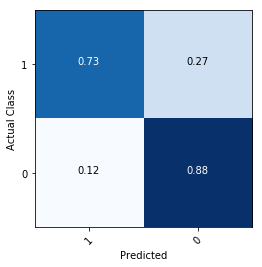

In [43]:
def evaluate_classifcation(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    fig,ax = plot_confusion_matrix(cm)
    
    print_classification_report(y_true,y_pred)
    
evaluate_classifcation(y_test,y_hat_test)

In [52]:
# def roc_auc(cm):
cm

array([[24,  9],
       [ 5, 38]])

AUC: 0.8823114869626498


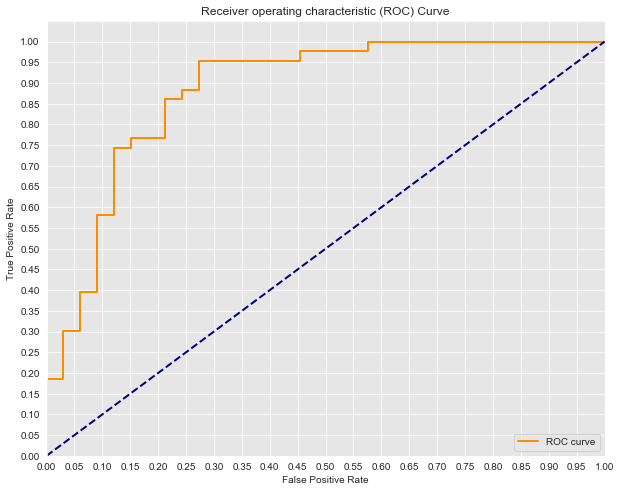

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c20495320>)

In [72]:
def plot_roc_auc(X_train,X_test,y_train,y_test,figsize=(10, 8),ax=None):
    if ax is None:
        fig,ax=plt.subplots(figsize=figsize)
        
    else:
        fig = ax.get_figure()
    from sklearn.metrics import auc,roc_curve
    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr,tpr,thresh = roc_curve(y_test,y_score)


    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

    print('AUC: {}'.format(auc(fpr, tpr)))
#     ax = plt.figure(figsize=figsize)
#     fig= ax.get_figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    return fig,ax
plot_roc_auc(X_train,X_test,y_train,y_test)

[i] TEST DATA:
------------------------------------------------------------
[i] CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.81      0.88      0.84        43

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76

------------------------------------------------------------
AUC: 0.8823114869626498


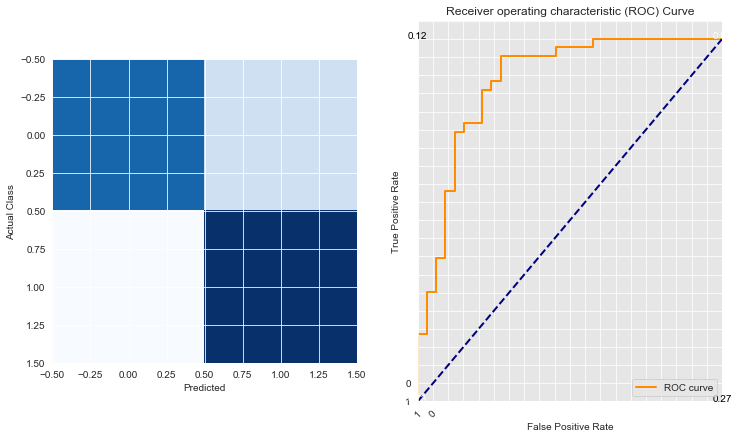

In [80]:
def evaluate_classifcation_model(X_train,X_test,y_test,y_train,logreg):
    
    ## Test Data 
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)
    
    print('[i] TEST DATA:')
    print_classification_report(y_test,y_hat_test)
    
    
    cm = confusion_matrix(y_test,y_hat_test)
    fig,ax = plt.subplots(ncols=2,figsize=(12,7))
    plot_confusion_matrix(cm,ax=ax[0])
    
    plot_roc_auc(X_train,X_test,y_train,y_test,ax=ax[1])


#     plt.tight_layout()
    
    
evaluate_classifcation_model(X_train,X_test,y_test,y_train,logreg)

# Evaluating Classifications

## Confusion Matrices

[Metrics & Confusion Matrices](../../EvaluatingModels/evaluation_metrics.ipynb)

In [ ]:
fs.ihelp(fs.jmi.plot_confusion_matrix,0)

In [ ]:
## make a plotting function
# cm = metrics.confusion_matrix(y_test,y_hat_test)

def plot_confusion_matrix():
    pass

# SUMMARY/BIG PICTURE

- Logistic Regression
- Evaluation Metrics for Classification
- confusion matrices, roc_auc
- Putting it all together into a report

## ROC & AUC

[ROC Curve & AUC for Evaluation](../../EvaluatingModels/evaluation_curves.ipynb)